## GEV fit

In [1]:
# import numpy as np
# from scipy.stats import genextreme

# def qq_rmse(empirical_data, mu, sigma, xi, time=None, mu_func=None, sigma_func=None):
#     """
#     Compute Q–Q RMSE between empirical and GEV-fitted quantiles.

#     Parameters
#     ----------
#     empirical_data : array-like
#         Sorted annual maxima (1D array).
#     mu : float or None
#         Location parameter for stationary GEV.
#     sigma : float or None
#         Scale parameter for stationary GEV.
#     xi : float
#         Shape parameter (stationary or assumed shared across time).
#     time : array-like or None
#         If non-stationary, time points corresponding to the empirical data.
#     mu_func : callable or None
#         If non-stationary, function mu(t) that returns location at time t.
#     sigma_func : callable or None
#         If non-stationary, function sigma(t) that returns scale at time t.

#     Returns
#     -------
#     rmse : float
#         Root mean squared error between empirical and model quantiles.
#     """

#     # Empirical quantiles: rank-based
#     sorted_data = np.sort(empirical_data)
#     n = len(sorted_data)
#     p = (np.arange(1, n+1) - 0.5) / n  # plotting positions

#     # Fitted quantiles from GEV
#     if time is None or (mu_func is None and sigma_func is None):
#         # Stationary case
#         gev_quantiles = genextreme.ppf(p, c=-xi, loc=mu, scale=sigma)
#     else:
#         # Non-stationary case
#         gev_quantiles = np.array([
#             genextreme.ppf(p[i], c=-xi, loc=mu_func(time[i]), scale=sigma_func(time[i]))
#             for i in range(n)
#         ])

#     # RMSE
#     rmse = np.sqrt(np.mean((sorted_data - gev_quantiles)**2))
#     return rmse

In [25]:
import pandas as pd
import numpy as np
from scipy.stats import genextreme
import single_loc_eval as sle

In [100]:
# Read
df_obs = pd.read_csv('/storage/group/pches/default/users/dcl5300/conus_comparison_lafferty-etal-2024/metrics/cities/boston_max_pr.csv')
# df_fit = pd.read_csv('/storage/group/pches/default/users/dcl5300/conus_comparison_lafferty-etal-2024/extreme_value/cities/original_grid/freq/boston_max_pr_1950-2014_2050-2100_lmom_stat_nbootproj100_nboothist1_samples.csv')
df_fit = pd.read_csv('/storage/group/pches/default/users/dcl5300/conus_comparison_lafferty-etal-2024/extreme_value/cities/original_grid/freq/boston_max_pr_1950-2100_mle_nonstat_nboot100_samples.csv')

In [101]:
import importlib
importlib.reload(sle)

<module 'single_loc_eval' from '/storage/work/dcl5300/current_projects/conus_comparison_lafferty-etal-2024/src/single_loc_eval.py'>

In [102]:
df_fit

,ensemble,gcm,member,ssp,n_boot,loc_intcp,loc_trend,scale,shape,10yr_return_level_1950,...,100yr_return_level_2075,100yr_return_level_2100,10yr_return_level_diff_2075-1975,25yr_return_level_diff_2075-1975,50yr_return_level_diff_2075-1975,100yr_return_level_diff_2075-1975,10yr_return_level_chfc_2075-1975,25yr_return_level_chfc_2075-1975,50yr_return_level_chfc_2075-1975,100yr_return_level_chfc_2075-1975
0,GARD-LENS,CESM2-LENS,1001_01,ssp370,main,62.734138,0.084123,24.690190,-0.105514,125.447192,...,219.450318,221.553398,8.412320,8.412320,8.412320,8.412320,1.065953,1.052984,1.045710,1.039862
1,GARD-LENS,CESM2-LENS,1001_01,ssp370,0,67.882124,0.022899,21.261774,-0.059982,119.108490,...,183.377360,183.949835,2.289900,2.289900,2.289900,2.289900,1.019133,1.015966,1.014141,1.012645
2,GARD-LENS,CESM2-LENS,1001_01,ssp370,1,59.614693,0.142221,24.297675,-0.052391,117.647144,...,203.784610,207.340128,14.222069,14.222069,14.222069,14.222069,1.117341,1.096239,1.084472,1.075026
3,GARD-LENS,CESM2-LENS,1001_01,ssp370,2,61.697002,0.055381,22.886801,-0.060418,116.866218,...,189.988060,191.372577,5.538069,5.538069,5.538069,5.538069,1.046833,1.038502,1.033812,1.030025
4,GARD-LENS,CESM2-LENS,1001_01,ssp370,3,60.171078,0.103204,24.264365,-0.100419,121.436740,...,214.946500,217.526612,10.320446,10.320446,10.320446,10.320446,1.083218,1.066897,1.057766,1.050436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47162,STAR-ESDM,NorESM2-MM,r1i1p1f1,ssp585,95,53.614013,0.094431,15.789080,0.044950,87.407276,...,131.032625,133.393403,9.443111,9.443111,9.443111,9.443111,1.105195,1.091668,1.083952,1.077664
47163,STAR-ESDM,NorESM2-MM,r1i1p1f1,ssp585,96,56.007857,0.083077,14.762228,0.078755,86.450985,...,123.360060,125.436989,8.307717,8.307717,8.307717,8.307717,1.093843,1.083223,1.077154,1.072208
47164,STAR-ESDM,NorESM2-MM,r1i1p1f1,ssp585,97,48.778684,0.133882,15.313510,0.041488,81.679942,...,129.644167,132.991205,13.388154,13.388154,13.388154,13.388154,1.157458,1.136620,1.124782,1.115161
47165,STAR-ESDM,NorESM2-MM,r1i1p1f1,ssp585,98,48.215690,0.153297,17.049200,0.113499,82.074725,...,128.475180,132.307615,15.329742,15.329742,15.329742,15.329742,1.178445,1.156780,1.144899,1.135487


In [119]:
if True:
    metric_id='max_pr'
    gcm='CanESM5'
    ssp='ssp585'
    member='r1i1p1f1'
    ensemble='LOCA2'
    gev_type='nonstat'
    confidence_level=0.95
    
    # Filter for climate data
    if gev_type == "stat":
        if ssp == "historical":
            # Historical stat fits are the same for all SSPs
            df_fit_sel = df_fit[
                (df_fit["gcm"] == gcm)
                & (df_fit["ssp"] == "ssp370")
                & (df_fit["member"] == member)
                & (df_fit["ensemble"] == ensemble)
            ]
            loc_name = "loc_hist"
            scale_name = "scale_hist"
            shape_name = "shape_hist"
        else:
            df_fit_sel = df_fit[
                (df_fit["gcm"] == gcm)
                & (df_fit["ssp"] == ssp)
                & (df_fit["member"] == member)
                & (df_fit["ensemble"] == ensemble)
            ]
            loc_name = "loc_proj"
            scale_name = "scale_proj"
            shape_name = "shape_proj"
    elif gev_type == 'nonstat':
        df_fit_sel = df_fit[
            (df_fit["gcm"] == gcm)
            & (df_fit["ssp"] == ssp)
            & (df_fit["member"] == member)
            & (df_fit["ensemble"] == ensemble)
        ]
    # Filter obs
    df_obs_sel = df_obs[
        (df_obs["gcm"] == gcm)
        & (df_obs["ssp"] == ssp)
        & (df_obs["member"] == member)
        & (df_obs["ensemble"] == ensemble)
    ]

In [124]:
main_fit = df_fit_sel[df_fit_sel["n_boot"] == "main"].iloc[0]
bootstrap_fits = df_fit_sel[df_fit_sel["n_boot"] != "main"]

In [159]:
# Get quantiles
gev_type = 'nonstat'
if gev_type == "stat":
    # Main params
    main_loc = main_fit[loc_name]
    main_scale = main_fit[scale_name]
    main_shape = main_fit[shape_name]
    
    # Bootstrap params
    bootstrap_loc = bootstrap_fits[loc_name]
    bootstrap_scale = bootstrap_fits[scale_name]
    bootstrap_shape = bootstrap_fits[shape_name]

    # Work in quantile space
    theoretical_quantiles = genextreme.ppf(
                empirical_probs,
                main_shape,
                main_loc,
                main_scale)
elif gev_type == "nonstat":
    # Main params
    main_loc_intp = main_fit["loc_intcp"]
    main_loc_trend = main_fit["loc_trend"]
    main_locs = main_loc_intp + times * main_loc_trend
    main_scale = main_fit["scale"]
    main_shape = main_fit["shape"]
    
    # Bootstrap params
    bootstrap_loc_intcp = bootstrap_fits["loc_intcp"].to_numpy()
    bootstrap_loc_trend = bootstrap_fits["loc_trend"].to_numpy()
    bootstrap_scale = bootstrap_fits["scale"].to_numpy()
    bootstrap_shape = bootstrap_fits["shape"].to_numpy()

In [114]:
observed_data = df_obs_sel.sort_values(by="time")[var_id].to_numpy()
times = np.sort(df_obs_sel["time"].to_numpy() - 1950)

In [142]:
z_resids = -1/main_shape * np.log(1 - main_shape * (observed_data - main_locs) / main_scale)
z_sorted = np.sort(z_resids)

In [146]:
empirical_quantiles = -np.log(-np.log(empirical_probs))

In [160]:
n_bootstrap = len(bootstrap_loc_intcp)

In [161]:
bootstrap_observed_quantiles = np.zeros(n_bootstrap)

for b in range(n_bootstrap):
    # For each bootstrap iteration b
    bootstrap_locs_b = bootstrap_loc_intcp[b] + times * bootstrap_loc_trend[b]
    bootstrap_scale_b = bootstrap_scale[b] 
    bootstrap_shape_b = bootstrap_shape[b]

    # Transform and sort for this bootstrap sample
    # Transform original data with bootstrap parameters
    z_resids_b = -1/bootstrap_shape_b * np.log(1 - bootstrap_shape_b * (observed_data - bootstrap_locs_b) / bootstrap_scale_b)
    z_sorted_b = np.sort(z_resids_b)
    bootstrap_observed_quantiles[b] = z_sorted_b

ValueError: setting an array element with a sequence.

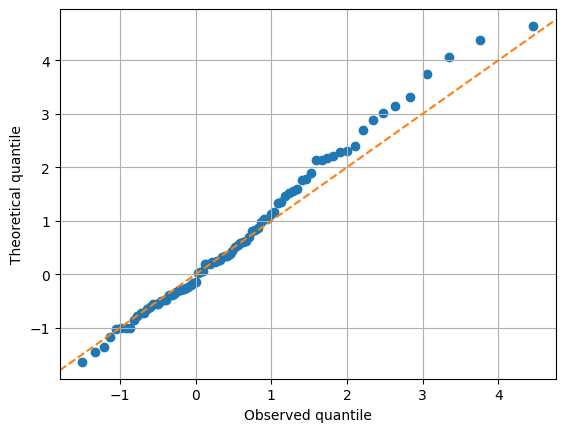

In [150]:
fig, ax =plt.subplots()
ax.scatter(empirical_quantiles, z_sorted)
ylims = ax.get_ylim()
xlims = ax.get_xlim()
ax.axline((1, 1), slope=1, color='C1', ls='--')
ax.set_ylim(ylims)
ax.set_xlim(xlims)
ax.set_ylabel('Theoretical quantile')
ax.set_xlabel('Observed quantile')
ax.grid()

In [144]:
z_sorted

array([-1.63762342, -1.44399523, -1.36118576, -1.16327107, -1.0300768 ,
       -1.00593483, -0.99915437, -0.99895841, -0.84714038, -0.78500776,
       -0.72326901, -0.71590963, -0.65704068, -0.61090905, -0.561983  ,
       -0.5610382 , -0.55436239, -0.50415697, -0.48392777, -0.48127196,
       -0.39124822, -0.3895616 , -0.36248517, -0.33550412, -0.30060731,
       -0.28687015, -0.27796333, -0.2586535 , -0.2295809 , -0.19400366,
       -0.15468301, -0.14215074,  0.01967634,  0.03535368,  0.05740632,
        0.19670132,  0.19843218,  0.19921803,  0.22632293,  0.2279554 ,
        0.252057  ,  0.27525652,  0.3184837 ,  0.33668752,  0.33785308,
        0.37184202,  0.43075418,  0.51841277,  0.54726406,  0.5779789 ,
        0.60939472,  0.62120055,  0.69139589,  0.8069416 ,  0.83487012,
        0.86681428,  0.96785287,  1.0282786 ,  1.03590917,  1.13442487,
        1.16311507,  1.32493331,  1.35231844,  1.4664714 ,  1.52272358,
        1.56482662,  1.60249413,  1.75383965,  1.77306274,  1.88

In [145]:
theoretical_quantiles

array([-1.49647258e+00, -1.32780708e+00, -1.21411000e+00, -1.12480419e+00,
       -1.04958667e+00, -9.83631068e-01, -9.24258096e-01, -8.69813852e-01,
       -8.19199726e-01, -7.71645477e-01, -7.26588168e-01, -6.83602509e-01,
       -6.42358370e-01, -6.02593604e-01, -5.64095975e-01, -5.26690742e-01,
       -4.90231886e-01, -4.54595761e-01, -4.19676407e-01, -3.85382016e-01,
       -3.51632227e-01, -3.18356028e-01, -2.85490099e-01, -2.52977491e-01,
       -2.20766564e-01, -1.88810111e-01, -1.57064647e-01, -1.25489803e-01,
       -9.40478276e-02, -6.27031538e-02, -3.14220306e-02, -1.72201027e-04,
        3.10773808e-02,  6.23568025e-02,  9.36954213e-02,  1.25122073e-01,
        1.56665265e-01,  1.88353361e-01,  2.20214754e-01,  2.52278038e-01,
        2.84572177e-01,  3.17126674e-01,  3.49971742e-01,  3.83138485e-01,
        4.16659084e-01,  4.50566995e-01,  4.84897162e-01,  5.19686251e-01,
        5.54972897e-01,  5.90797991e-01,  6.27204984e-01,  6.64240241e-01,
        7.01953432e-01,  

In [83]:
bootstrap_theoretical_quantiles = np.zeros((len(bootstrap_fits), n))

for i in range(len(bootstrap_fits)):
    # Convert these probabilities to theoretical quantiles using main fit
    bootstrap_theoretical_quantiles[i, :] = genextreme.ppf(
        empirical_probs,
        bootstrap_shape.iloc[i],
        bootstrap_loc.iloc[i],
        bootstrap_scale.iloc[i]
    )

In [62]:
lower = np.quantile(bootstrap_theoretical_quantiles, 0.025, axis=0)
upper = np.quantile(bootstrap_theoretical_quantiles, 0.975, axis=0)

In [98]:
frac_within_band = np.mean((observed_sorted >= lower) * (observed_sorted <= upper))

In [99]:
frac_within_band

0.7906976744186046

In [87]:
(observed_sorted >= lower)

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True, False, False, False, False,
       False, False,  True,  True,  True,  True,  True, False, False,
       False,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [88]:
(observed_sorted <= upper)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True])

In [47]:
import matplotlib.pyplot as plt

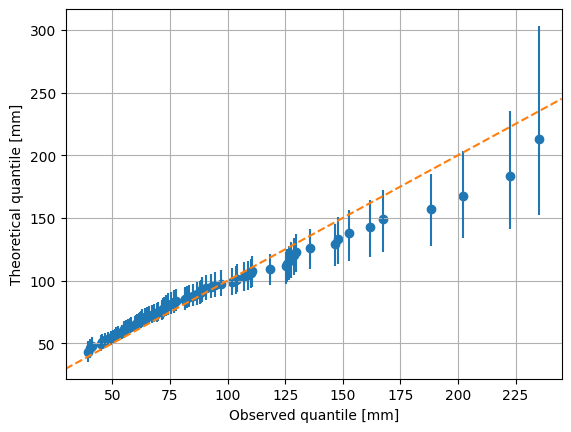

In [80]:
fig, ax = plt.subplots()
ax.scatter(x = observed_sorted, y = theoretical_quantiles, color='C0')
ax.errorbar(x = observed_sorted,
            y = theoretical_quantiles,
            yerr = [theoretical_quantiles - lower, upper - theoretical_quantiles],
           color='C0', linestyle='none')
ylims = ax.get_ylim()
xlims = ax.get_xlim()
ax.axline((1, 1), slope=1, color='C1', ls='--')
ax.set_ylim(ylims)
ax.set_xlim(xlims)
ax.set_ylabel('Theoretical quantile [mm]')
ax.set_xlabel('Observed quantile [mm]')
ax.grid()
plt.show()

In [45]:
observed_sorted

array([ 39.52497864,  40.48055649,  40.98209   ,  45.09809113,
        45.64904404,  46.6578598 ,  48.2021637 ,  49.33039856,
        50.20975494,  51.00121689,  51.79153824,  52.65491104,
        54.40570068,  54.92744446,  55.15781784,  55.24777985,
        55.79896164,  56.91883087,  57.6896019 ,  58.04307556,
        59.77877045,  60.30466843,  60.84838104,  61.42035294,
        61.98075867,  62.29198837,  62.70613098,  62.81740189,
        64.13226318,  64.20275116,  65.01985931,  65.94571686,
        67.3969574 ,  68.20468903,  69.34407806,  69.63773346,
        71.54164886,  71.60263824,  71.79975891,  72.08200836,
        72.53993225,  73.25047302,  73.26435852,  73.95308685,
        75.31369019,  76.58966064,  76.82559204,  77.53728485,
        81.3261261 ,  81.33076477,  82.59706879,  83.262146  ,
        84.94334412,  86.73323822,  88.25179291,  88.33937836,
        88.94056702,  89.10385895,  90.59328461,  92.82841492,
        94.70336914,  97.20373535, 101.83751678, 103.75

In [42]:
theoretical_quantiles

array([ 43.30058124,  46.2114228 ,  48.21828203,  49.82033944,
        51.18748948,  52.39987072,  53.50221674,  54.52227284,
        55.47854914,  56.38407711,  57.24842031,  58.07883442,
        58.88097677,  59.65936118,  60.41766113,  61.15891851,
        61.88569137,  62.60016108,  63.30421176,  63.99949011,
        64.68745147,  65.3693956 ,  66.04649508,  66.719818  ,
        67.39034637,  68.0589913 ,  68.7266056 ,  69.39399434,
        70.06192396,  70.73113003,  71.40232412,  72.07619986,
        72.75343841,  73.43471347,  74.12069596,  74.81205841,
        75.50947924,  76.21364689,  76.92526396,  77.64505143,
        78.37375291,  79.11213919,  79.86101288,  80.6212135 ,
        81.39362291,  82.17917119,  82.9788432 ,  83.7936857 ,
        84.6248154 ,  85.47342791,  86.34080791,  87.22834066,
        88.13752506,  89.06998881,  90.02750571,  91.01201583,
        92.02564903,  93.07075246,  94.14992306,  95.26604609,
        96.42234111,  97.62241726,  98.87034016, 100.17

In [30]:
main_fit

ensemble                        LOCA2
gcm                           CanESM5
member                       r1i1p1f1
ssp                            ssp370
n_boot                           main
loc_hist                    61.640486
scale_hist                  18.772842
shape_hist                  -0.087264
loc_proj                    64.498929
scale_proj                   17.58304
shape_proj                  -0.013347
10yr_return_level_hist     108.319711
25yr_return_level_hist     130.903191
50yr_return_level_hist     148.906459
100yr_return_level_hist    167.903726
10yr_return_level_proj     104.667431
25yr_return_level_proj     121.956575
50yr_return_level_proj     134.924754
100yr_return_level_proj    147.918143
10yr_return_level_diff       -3.65228
25yr_return_level_diff      -8.946616
50yr_return_level_diff     -13.981705
100yr_return_level_diff    -19.985583
10yr_return_level_chfc       0.966282
25yr_return_level_chfc       0.931655
50yr_return_level_chfc       0.906104
100yr_return

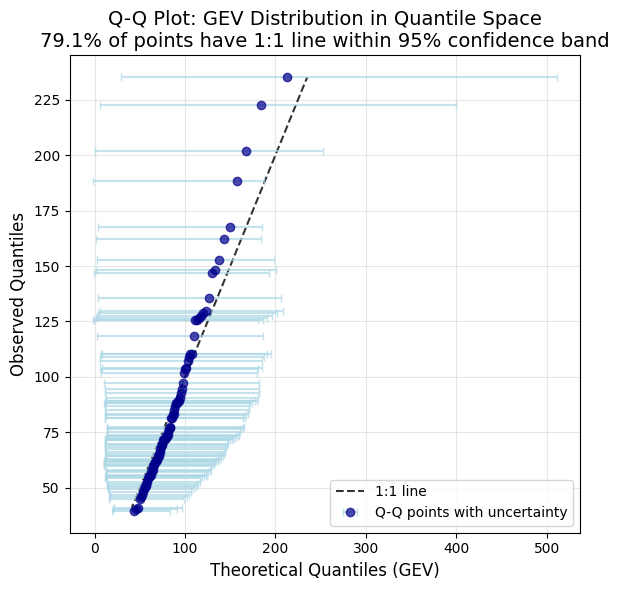

{'x_vals': array([ 43.30058124,  46.2114228 ,  48.21828203,  49.82033944,
         51.18748948,  52.39987072,  53.50221674,  54.52227284,
         55.47854914,  56.38407711,  57.24842031,  58.07883442,
         58.88097677,  59.65936118,  60.41766113,  61.15891851,
         61.88569137,  62.60016108,  63.30421176,  63.99949011,
         64.68745147,  65.3693956 ,  66.04649508,  66.719818  ,
         67.39034637,  68.0589913 ,  68.7266056 ,  69.39399434,
         70.06192396,  70.73113003,  71.40232412,  72.07619986,
         72.75343841,  73.43471347,  74.12069596,  74.81205841,
         75.50947924,  76.21364689,  76.92526396,  77.64505143,
         78.37375291,  79.11213919,  79.86101288,  80.6212135 ,
         81.39362291,  82.17917119,  82.9788432 ,  83.7936857 ,
         84.6248154 ,  85.47342791,  86.34080791,  87.22834066,
         88.13752506,  89.06998881,  90.02750571,  91.01201583,
         92.02564903,  93.07075246,  94.14992306,  95.26604609,
         96.42234111,  97.6224

In [36]:
sle.gev_qq_plot(
    df_fit=df_fit,
    df_obs=df_obs,
    metric_id='max_pr',
    gcm='CanESM5',
    ssp='ssp585',
    member='r1i1p1f1',
    ensemble='LOCA2',
    gev_type='stat',
    confidence_level=0.95,
    make_plot=True,
    plot_in_prob_space=False)

In [89]:
df_test = df_fit_ns[(df_fit_ns['gcm'] == 'CanESM5') & 
(df_fit_ns['member'] == 'r1i1p1f1') & 
(df_fit_ns['ensemble'] == 'STAR-ESDM') & 
(df_fit_ns['ssp'] == 'ssp245')].copy()

In [90]:
df_obs_sel = df_obs[(df_obs['gcm'] == 'CanESM5') & 
(df_obs['member'] == 'r1i1p1f1') & 
(df_obs['ensemble'] == 'STAR-ESDM') &
(df_obs['ssp'].isin(['historical', 'ssp245']))]
# x_data = df_obs[(df_obs['gcm'] == 'ACCESS-CM2') & (df_obs['member'] == 'r1i1p1f1') & (df_obs['ssp'] == 'historical')]['time']

In [91]:
data = df_obs_sel.sort_values('time')['pr'].to_numpy()
time = df_obs_sel.sort_values('time')['time'].to_numpy() - 1950

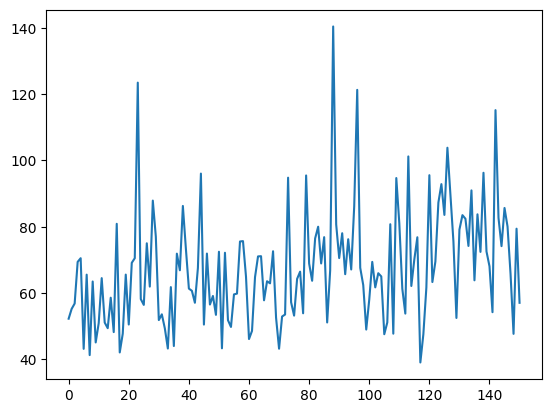

In [93]:
plt.plot(data)

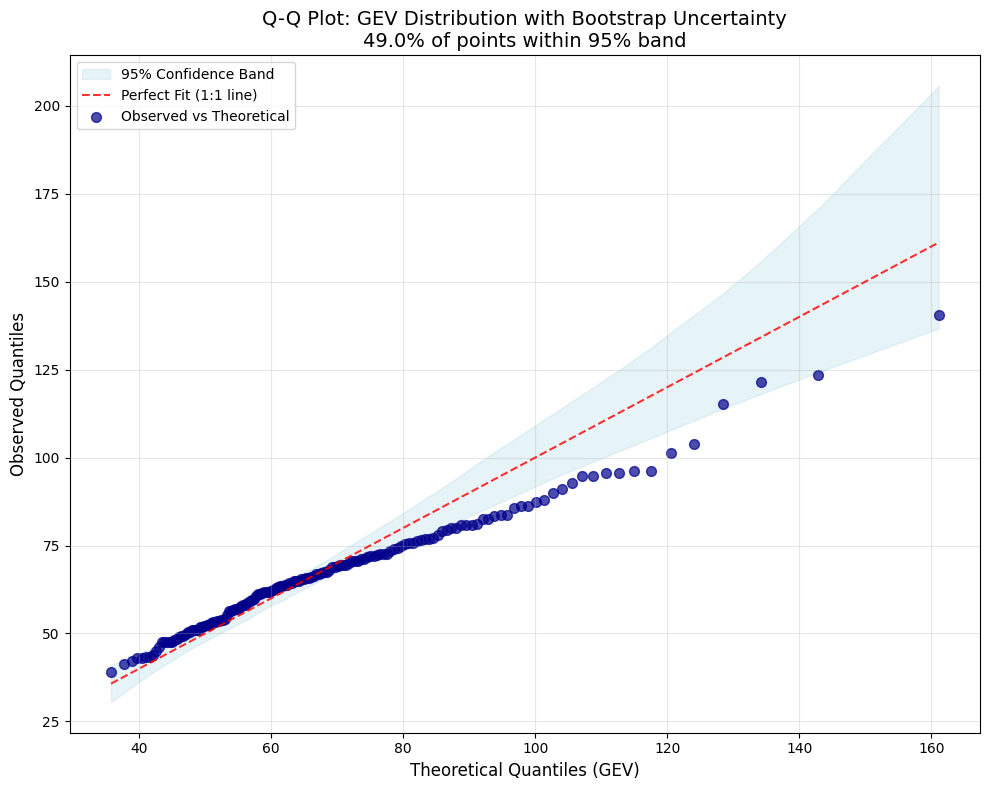

In [92]:
fig, percent_within, results = create_gev_qq_plot_with_uncertainty(
    df_test, data, time_covariate=time, confidence_level=0.95)

In [1]:
from scipy.stats import genextreme

In [ ]:
genextreme.ppf([0.1, 0.2], []

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy.stats import genextreme

def gev_quantile(p, loc, scale, shape):
    """
    Calculate GEV quantiles given parameters
    p: probability (0-1)
    loc: location parameter
    scale: scale parameter  
    shape: shape parameter
    """
    return genextreme.ppf(p, shape, loc=loc, scale=scale)

def create_gev_qq_plot_with_uncertainty(df, observed_data, time_covariate, 
                                       confidence_level=0.90, figsize=(10, 8)):
    """
    Create Q-Q plot for GEV distribution with bootstrap uncertainty bands
    
    Parameters:
    df: DataFrame with GEV fit results (your bootstrap results)
    observed_data: Array of observed extreme values
    time_covariate: Time covariate value(s) corresponding to observed data
                   Can be a single value or array matching observed_data length
    confidence_level: Confidence level for uncertainty bands (default 0.90)
    """
    
    # Filter for main fit and bootstrap samples
    main_fit = df[df['n_boot'] == 'main'].iloc[0]
    bootstrap_fits = df[df['n_boot'] != 'main']
    
    # Handle time covariate - can be single value or array
    if np.isscalar(time_covariate):
        time_val = time_covariate
    
        # Main fit parameters at specified time
        main_loc = main_fit['loc_intcp'] + main_fit['loc_trend'] * time_val
        main_scale = main_fit['scale_intcp'] + main_fit['scale_trend'] * time_val
        main_shape = main_fit['shape']
    
        # Bootstrap parameters at specified time
        boot_locs = bootstrap_fits['loc_intcp'] + bootstrap_fits['loc_trend'] * time_val
        boot_scales = bootstrap_fits['scale_intcp'] + bootstrap_fits['scale_trend'] * time_val
        boot_shapes = bootstrap_fits['shape']
    
    else:
        # Array of time covariates - use point-wise
        time_val = time_covariate
    
        # Main fit parameters for each time point
        main_locs = main_fit['loc_intcp'] + main_fit['loc_trend'] * time_val
        main_scales = main_fit['scale_intcp'] + main_fit['scale_trend'] * time_val
        main_shape = main_fit['shape']
    
        # Bootstrap parameters for each time point
        boot_locs = bootstrap_fits['loc_intcp'].values[:, np.newaxis] + bootstrap_fits['loc_trend'].values[:, np.newaxis] * time_val[np.newaxis, :]
        boot_scales = bootstrap_fits['scale_intcp'].values[:, np.newaxis] + bootstrap_fits['scale_trend'].values[:, np.newaxis] * time_val[np.newaxis, :]
        boot_shapes = bootstrap_fits['shape'].values[:, np.newaxis]
    
    # Sort observed data
    observed_sorted = np.sort(observed_data)
    n = len(observed_sorted)
    
    # Empirical probabilities (using plotting positions)
    empirical_probs = (np.arange(1, n + 1) - 0.5) / n
    
    if np.isscalar(time_covariate):
        # Theoretical quantiles from main fit
        theoretical_quantiles = gev_quantile(empirical_probs, main_loc, main_scale, main_shape)
    
        # Bootstrap quantiles for uncertainty estimation
        bootstrap_quantiles = np.zeros((len(bootstrap_fits), n))
        for i in range(len(bootstrap_fits)):
            bootstrap_quantiles[i, :] = gev_quantile(empirical_probs, boot_locs.iloc[i], boot_scales.iloc[i], boot_shapes.iloc[i])
        
    else:
        # Point-wise theoretical quantiles
        theoretical_quantiles = np.array([gev_quantile(empirical_probs[i], main_locs[i], main_scales[i], main_shape) 
                                    for i in range(n)])
    
        # Point-wise bootstrap quantiles
        bootstrap_quantiles = np.zeros((len(bootstrap_fits), n))
        for i in range(len(bootstrap_fits)):
            for j in range(n):
                bootstrap_quantiles[i, j] = gev_quantile(empirical_probs[j], boot_locs[i, j], boot_scales[i, j], boot_shapes[i, 0])
    
    # Calculate confidence bands
    alpha = 1 - confidence_level
    lower_percentile = (alpha / 2) * 100
    upper_percentile = (1 - alpha / 2) * 100
    
    lower_band = np.nanpercentile(bootstrap_quantiles, lower_percentile, axis=0)
    upper_band = np.nanpercentile(bootstrap_quantiles, upper_percentile, axis=0)
    
    # Create the plot
    fig, ax = plt.subplots(figsize=figsize)
    
    # Plot uncertainty band
    ax.fill_between(theoretical_quantiles, lower_band, upper_band, 
                   alpha=0.3, color='lightblue', 
                   label=f'{confidence_level*100:.0f}% Confidence Band')
    
    # Plot 1:1 line
    min_val = min(np.min(observed_sorted), np.min(theoretical_quantiles))
    max_val = max(np.max(observed_sorted), np.max(theoretical_quantiles))
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.8, 
            label='Perfect Fit (1:1 line)')
    
    # Plot Q-Q points
    ax.scatter(theoretical_quantiles, observed_sorted, alpha=0.7, s=50, 
              color='darkblue', label='Observed vs Theoretical')
    
    # Calculate percentage of points within band
    within_band = np.sum((observed_sorted >= lower_band) & (observed_sorted <= upper_band))
    percent_within = (within_band / n) * 100
    
    # Labels and formatting
    ax.set_xlabel(f'Theoretical Quantiles (GEV)', fontsize=12)
    ax.set_ylabel('Observed Quantiles', fontsize=12)
    ax.set_title(f'Q-Q Plot: GEV Distribution with Bootstrap Uncertainty\n'
                f'{percent_within:.1f}% of points within {confidence_level*100:.0f}% band', 
                fontsize=14)
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Make axes equal for better comparison
    # ax.set_aspect('equal', adjustable='box')
    
    plt.tight_layout()
    return fig, percent_within, {
        'theoretical_quantiles': theoretical_quantiles,
        'observed_quantiles': observed_sorted,
        'lower_band': lower_band,
        'upper_band': upper_band,
        'empirical_probs': empirical_probs
    }

def calculate_band_coverage(observed, lower_band, upper_band):
    """
    Calculate what percentage of observed points fall within the confidence band
    """
    within_band = np.sum((observed >= lower_band) & (observed <= upper_band))
    return (within_band / len(observed)) * 100